In [8]:
file_path = "car_prices.csv"
df = pd.read_csv(file_path)

In [12]:
# Data Cleaning & Preprocessing Data Cleaning & Preprocessing
# Step 1: Load the Dataset
import pandas as pd

# File path to the dataset
file_path = "car_prices.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Print dataset summary information
print("\nDataset Information:")
print(df.info())  # Provides column data types and non-null counts

# Print the shape of the dataset
print("\nDataset Shape:")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")

# Print the column names
print("\nColumn Names:")
print(df.columns.tolist())

# Print summary statistics
print("\nDataset Summary Statistics:")
print(df.describe())



First 5 rows of the dataset:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1    

In [28]:
# Step 2: Inspect for Missing Data, Duplicates, and Irrelevant Columns

# 1. Check for missing values:
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Select only critical columns
df = df[['year', 'make', 'model', 'state', 'condition', 'odometer', 'sellingprice', 'mmr']]

print(df.isnull().sum())
print(df.duplicated().sum())
print("\nDuplicates Removed. Shape of the dataset:")
print(df.shape)  # Show the shape of the dataset after dropping duplicates
print("\nSelected Columns. Preview of Data:")
print(df.head())  # Show the first 5 rows of the selected columns

year            0
make            0
model           0
state           0
condition       0
odometer        0
sellingprice    0
mmr             0
dtype: int64
0

Duplicates Removed. Shape of the dataset:
(312348, 8)

Selected Columns. Preview of Data:
   year   make                model state condition  odometer  sellingprice  \
0  2015    Kia              Sorento    ca       5.0   16639.0       21500.0   
1  2015    Kia              Sorento    ca       5.0    9393.0       21500.0   
2  2014    BMW             3 Series    ca      45.0    1331.0       30000.0   
3  2015  Volvo                  S60    ca      41.0   14282.0       27750.0   
4  2014    BMW  6 Series Gran Coupe    ca      43.0    2641.0       67000.0   

       mmr  
0  20500.0  
1  20800.0  
2  31900.0  
3  27500.0  
4  66000.0  


In [16]:
# Step 3: Handle Missing Values
# Check again for missing values after column selection
df.isnull().sum()
print(df.isnull().sum())

year                0
make             4991
model            5044
state               0
condition       11793
odometer           81
sellingprice        2
mmr                 2
dtype: int64


In [18]:
# Impute missing values for 'condition' with mode (most frequent value)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)

# Impute missing values for 'odometer', 'sellingprice', and 'mmr' with median
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['sellingprice'].fillna(df['sellingprice'].median(), inplace=True)
df['mmr'].fillna(df['mmr'].median(), inplace=True)

# If You Want to Keep make and model:
df['make'].fillna('Unknown', inplace=True)
df['model'].fillna('Unknown', inplace=True)

print(df['odometer'].fillna)
print(df['sellingprice'].fillna)
print(df['mmr'].fillna)
print(df['make'].fillna)  
print(df['model'].fillna)


<bound method NDFrame.fillna of 0          16639.0
1           9393.0
2           1331.0
3          14282.0
4           2641.0
            ...   
312343    108434.0
312344     28516.0
312345    142877.0
312346    145454.0
312347    154385.0
Name: odometer, Length: 312348, dtype: float64>
<bound method NDFrame.fillna of 0         21500.0
1         21500.0
2         30000.0
3         27750.0
4         67000.0
           ...   
312343     6300.0
312344     4200.0
312345     2800.0
312346     7200.0
312347    11800.0
Name: sellingprice, Length: 312348, dtype: float64>
<bound method NDFrame.fillna of 0         20500.0
1         20800.0
2         31900.0
3         27500.0
4         66000.0
           ...   
312343     5300.0
312344     3375.0
312345     2750.0
312346     6900.0
312347    12000.0
Name: mmr, Length: 312348, dtype: float64>
<bound method NDFrame.fillna of 0           Kia
1           Kia
2           BMW
3         Volvo
4           BMW
          ...  
312343     Ford
312344    Do

In [24]:
# Step 4: Correct Data Types
# Check and convert data types to appropriate formats.
# Check data types
df.dtypes

# Convert year to integer and condition to category
df['year'] = df['year'].astype(int)
df['condition'] = df['condition'].astype('category')

# Convert odometer and selling_price to numeric (if not already)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')


In [22]:
# Step 5: Final Inspection and Save Cleaned Dataset
# After cleaning, perform a final inspection and save the cleaned dataset.
# Final inspection
df.info()
df.describe()

# Save the cleaned dataset
df.to_csv('cleaned_car_prices-1.csv', index=False)

# Preview the data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312348 entries, 0 to 312347
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          312348 non-null  int64   
 1   make          312348 non-null  object  
 2   model         312348 non-null  object  
 3   state         312348 non-null  object  
 4   condition     312348 non-null  category
 5   odometer      312348 non-null  float64 
 6   sellingprice  312348 non-null  float64 
 7   mmr           312348 non-null  float64 
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 17.0+ MB


,year,make,model,state,condition,odometer,sellingprice,mmr
0,2015,Kia,Sorento,ca,5.0,16639.0,21500.0,20500.0
1,2015,Kia,Sorento,ca,5.0,9393.0,21500.0,20800.0
2,2014,BMW,3 Series,ca,45.0,1331.0,30000.0,31900.0
3,2015,Volvo,S60,ca,41.0,14282.0,27750.0,27500.0
4,2014,BMW,6 Series Gran Coupe,ca,43.0,2641.0,67000.0,66000.0


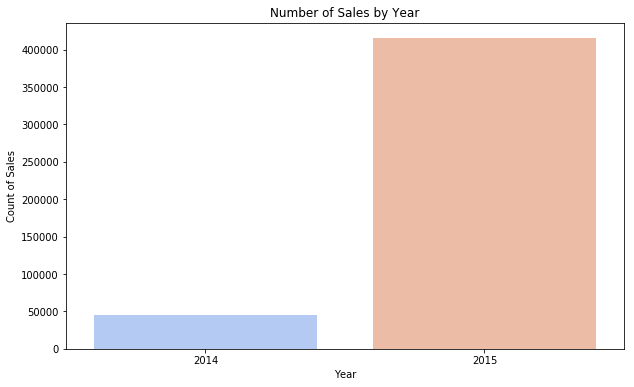

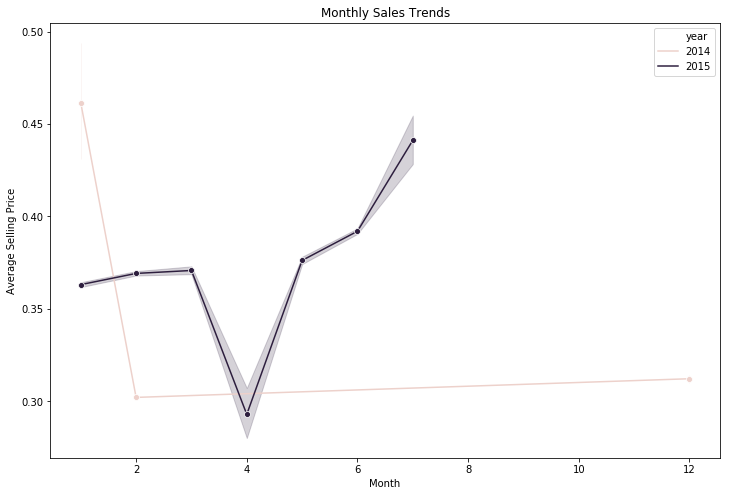

In [15]:
# 1. Sales Trends & Temporal Analysis (Cross-Check for Abimbola)
# Objective: Validate time-based trends and identify seasonality

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Ensure the 'saledate' column is a datetime object
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract year and month
df['year'] = df['saledate'].dt.year
df['month'] = df['saledate'].dt.month

# Plot sales counts by year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year', palette='coolwarm')
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Count of Sales')
plt.show()

# Plot monthly trends across years (optional)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='month', y='sellingprice', hue='year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Average Selling Price')
plt.show()


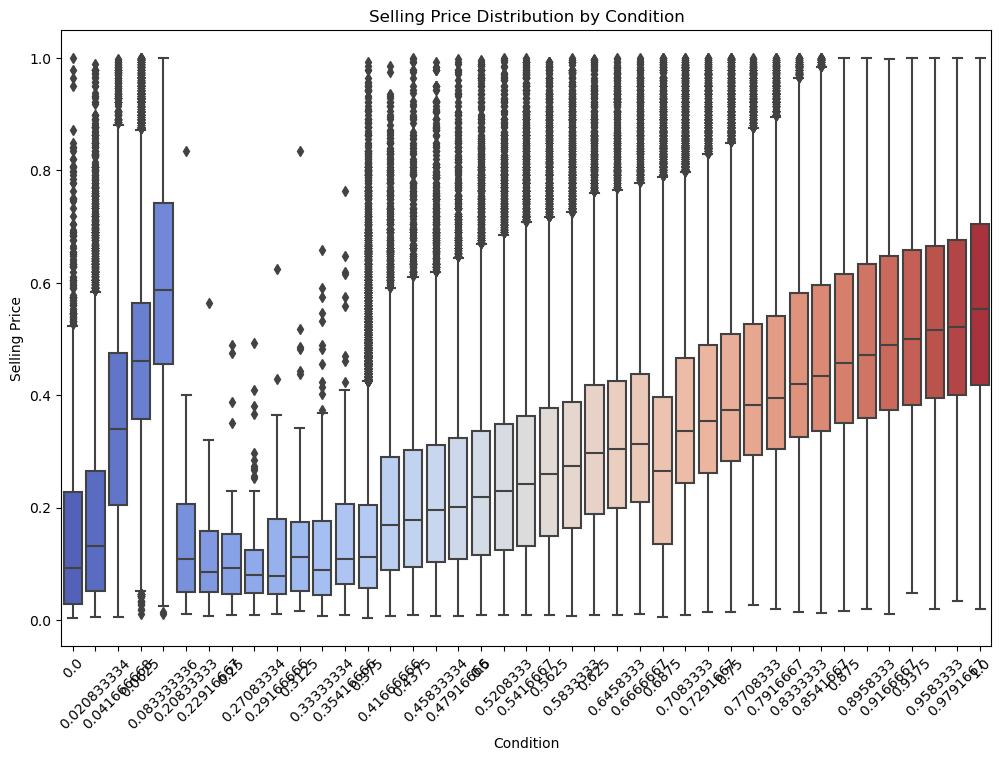

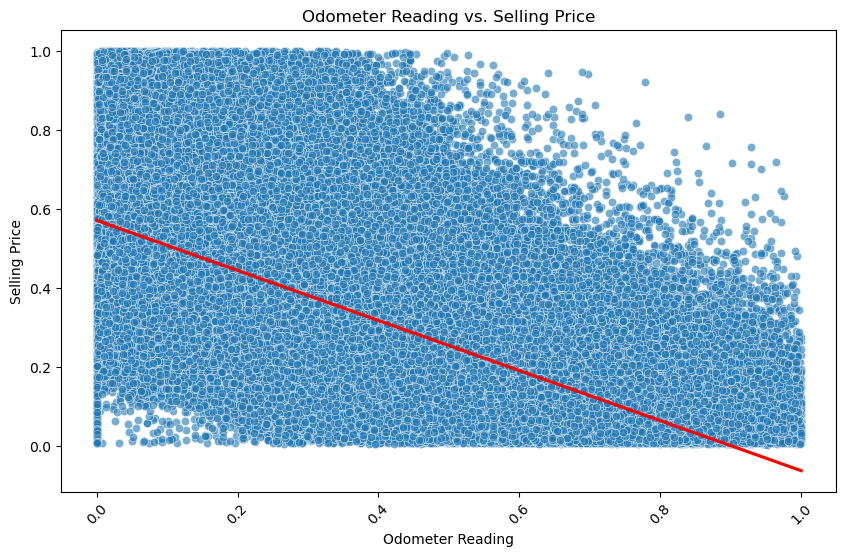

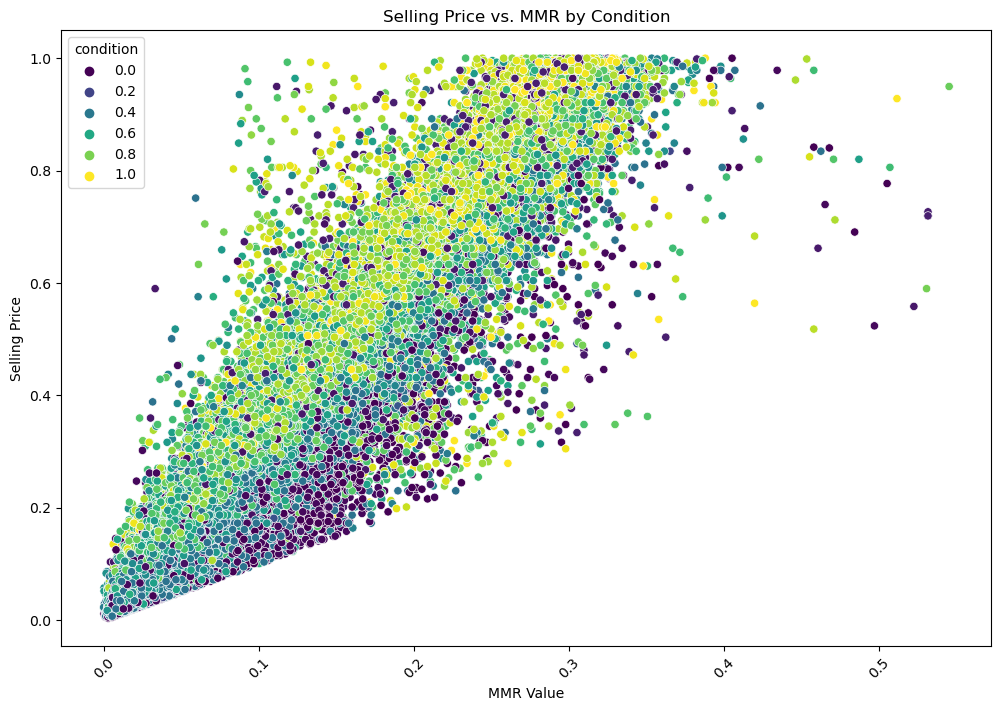

In [34]:
# 2. Vehicle Features & Pricing (Cross-Check for Augustus)
# Objective: Explore how vehicle attributes impact pricing.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Box plot for condition vs. selling price
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='condition', y='sellingprice', palette='coolwarm')
plt.title('Selling Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('selling_price_distribution_by_condition.png', dpi=300, bbox_inches='tight')

plt.show()

# Scatter plot for odometer vs. selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('Odometer Reading vs. Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('odometer_reading_vs_selling_price.png', dpi=300, bbox_inches='tight')

plt.show()

# Selling Price vs. MMR Comparison
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mmr', y='sellingprice', hue='condition', palette='viridis')
plt.title('Selling Price vs. MMR by Condition')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('selling_price_vs_mmr_by_condition.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 2. Vehicle Features & Pricing (Cross-Check for Augustus)
# Objective: Explore how vehicle attributes impact pricing.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Box plot for condition vs. selling price
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='condition', y='sellingprice', palette='coolwarm')
plt.title('Selling Price Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

# Save the plot as a .png file
plt.savefig('selling_price_distribution_by_condition.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# 2. Vehicle Features & Pricing (Cross-Check for Augustus)
# Objective: Explore how vehicle attributes impact pricing.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Scatter plot for odometer vs. selling price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('Odometer Reading vs. Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')

# Save the plot as a .png file
plt.savefig('odometer_reading_vs_selling_price.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# 2. Vehicle Features & Pricing (Cross-Check for Augustus)
# Objective: Explore how vehicle attributes impact pricing.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Selling Price vs. MMR Comparison
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mmr', y='sellingprice', hue='condition', palette='viridis')
plt.title('Selling Price vs. MMR by Condition')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')
# Save the plot as a .png file
plt.savefig('selling_price_vs_mmr_by_condition.png', dpi=300, bbox_inches='tight')
plt.show()

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

plt.show()

In [ ]:
# 3. Regional & Market Insights (Cross-Check for Shola)
# Objective: Identify geographic and market patterns.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\master pc\Downloads\Group9_RegonetDA_Car_Prices\cleaned_car_prices_david.csv'
df = pd.read_csv(file_path)

# Sales by state
state_sales = df.groupby('state')['sellingprice'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=state_sales, x='state', y='sellingprice', palette='Blues_d')
plt.title('Average Selling Price by State')
plt.xlabel('State')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)
plt.show()  # Show first plot

plt.savefig('average_selling_price_by_state.png', dpi=300, bbox_inches='tight')

# Heatmap if latitude/longitude exist
if 'latitude' in df.columns and 'longitude' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='longitude', y='latitude', hue='sellingprice', palette='coolwarm', size='sellingprice', sizes=(20, 200))
    plt.title('Geographic Price Distribution')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()  # Show second plot

    plt.savefig('geographic_price_distribution.png', dpi=300, bbox_inches='tight')


In [ ]:
# EDA Visualizations for Used Car Price Analysis
# 1. Price Trends Over Time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Average selling price by year
price_trend = df.groupby('year')['sellingprice'].mean().reset_index()

# Line plot to show the average selling price trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend, x='year', y='sellingprice', marker='o')
plt.title('Average Selling Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()


In [ ]:
# EDA Visualizations for Used Car Price Analysis
# 1b. Price Trends Over Time

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Average selling price by year
price_trend = df.groupby('year')['sellingprice'].mean().reset_index()

# Line plot to show the average selling price trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_trend, x='year', y='sellingprice', marker='o')
plt.title('Average Selling Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)

# Save the plot as a .png file
plt.savefig('average_selling_price_over_the_years.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 2. Top 10 Makes by Sales Volume

top_makes = df['make'].value_counts().head(10).reset_index()
top_makes.columns = ['make', 'count']

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_makes, x='make', y='count', palette='viridis')
plt.title('Top 10 Vehicle Makes by Sales Volume')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 2b. Top 10 Makes by Sales Volume
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

top_makes = df['make'].value_counts().head(10).reset_index()
top_makes.columns = ['make', 'count']

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_makes, x='make', y='count', palette='viridis')
plt.title('Top 10 Vehicle Makes by Sales Volume')
plt.xlabel('Vehicle Make')
plt.ylabel('Number of Vehicles Sold')
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('top_10_vehicle_makes_by_sales_volume.png', dpi=300, bbox_inches='tight')
plt.show()

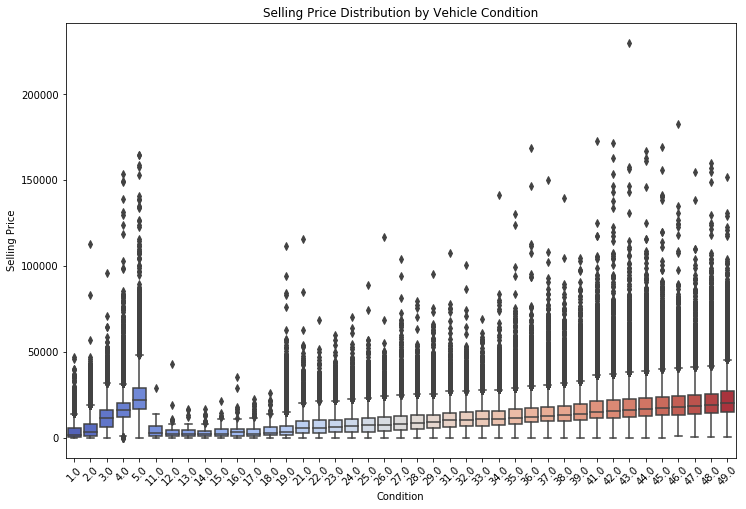

In [4]:
# 3. Price Distribution by Vehicle Condition

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='condition', y='sellingprice', palette='coolwarm')
plt.title('Selling Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('selling_price_distribution_by_vehicle_condition_1.png', dpi=300, bbox_inches='tight')

plt.show()



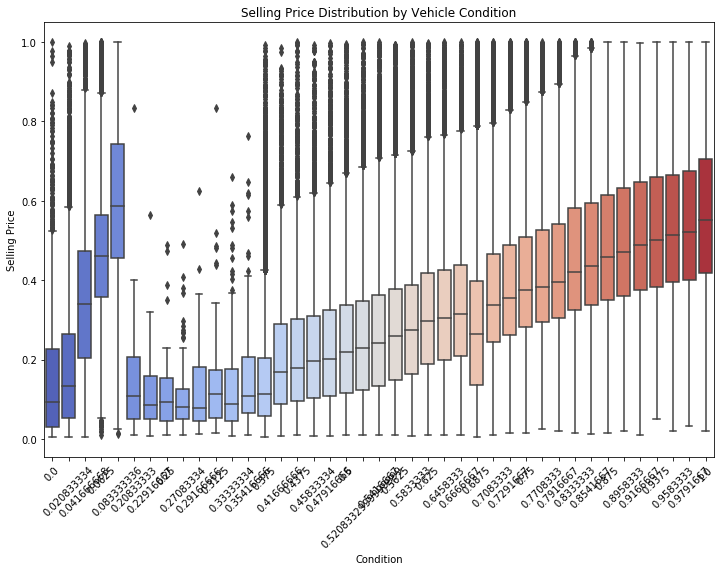

In [3]:
# 3b. Price Distribution by Vehicle Condition

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='condition', y='sellingprice', palette='coolwarm')
plt.title('Selling Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

# Rotate x-axis labels to avoid squashing
plt.xticks(rotation=45)

# Save the plot as a .png file
plt.savefig('selling_price_distribution_by_vehicle_condition.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 4. Odometer Reading vs. Selling Price

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

# 4. Odometer Reading vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('Odometer Reading vs. Selling Price')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price')

# Save the plot as a .png file
plt.savefig('odometer_reading_vs_selling_price-1.png', dpi=300, bbox_inches='tight')
plt.show()


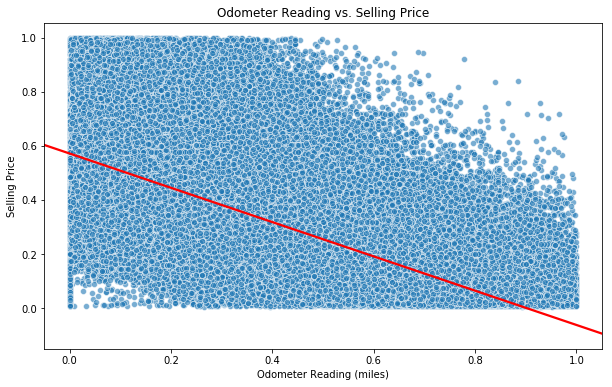

In [18]:
# 4b. Odometer Reading vs. Selling Price

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

# 4. Odometer Reading vs. Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='odometer', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='odometer', y='sellingprice', scatter=False, color='red')
plt.title('Odometer Reading vs. Selling Price')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
# 5. State-wise Price Comparison

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

state_price = df.groupby('state')['sellingprice'].mean().reset_index()
state_price = state_price.sort_values(by='sellingprice', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(data=state_price, x='state', y='sellingprice', palette='Blues_d')
plt.title('Average Selling Price by State')
plt.xlabel('State')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90)

# Save the plot as a .png file
plt.savefig('average_selling_price_by_state.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 6. MMR Value vs. Selling Price
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mmr', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='mmr', y='sellingprice', scatter=False, color='green')
plt.title('MMR Value vs. Selling Price')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')
plt.show()

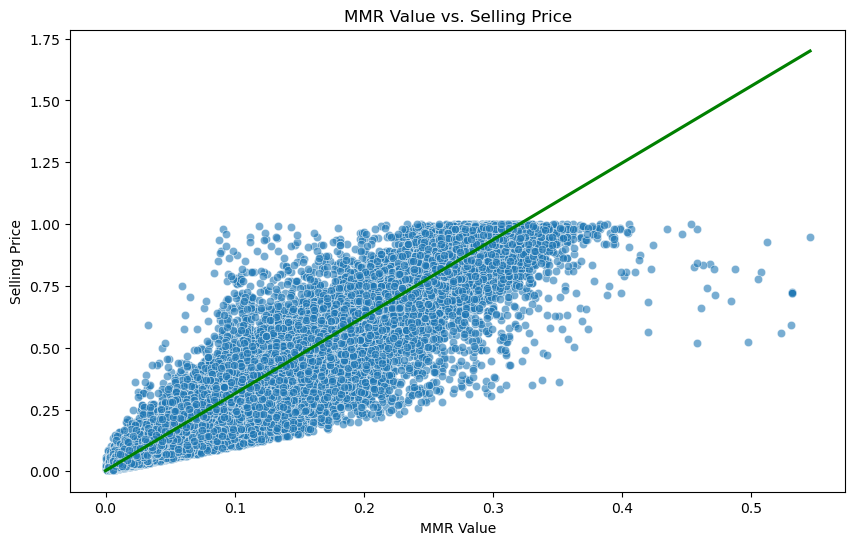

In [53]:
# 6b. MMR Value vs. Selling Price
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mmr', y='sellingprice', alpha=0.6)
sns.regplot(data=df, x='mmr', y='sellingprice', scatter=False, color='green')
plt.title('MMR Value vs. Selling Price')
plt.xlabel('MMR Value')
plt.ylabel('Selling Price')

# Save the plot as a .png file
plt.savefig('mmr_value_vs_selling_price.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 7. Vehicle Age vs. Selling Price Depreciation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"

df = pd.read_csv(file_path)

# Convert 'year' column to integer (if needed)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Calculate vehicle age
current_year = df['year'].max()  # or use a fixed year if needed (e.g., 2024)
df['vehicle_age'] = current_year - df['year']

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='vehicle_age', y='sellingprice', marker='o')
plt.title('Vehicle Age vs. Selling Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Average Selling Price')
plt.grid(True)

# Save the plot as a .png file
plt.savefig('vehicle_age_vs_selling_price-1.png', dpi=300, bbox_inches='tight')

plt.show()


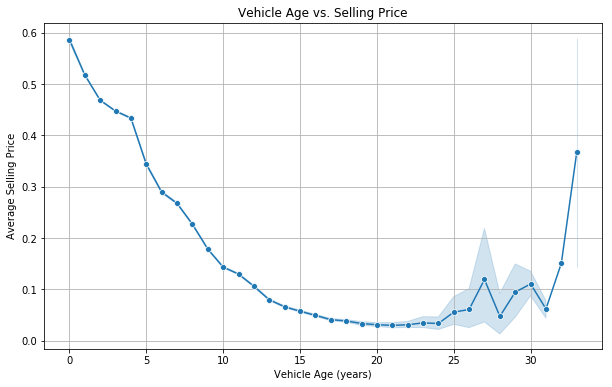

In [6]:
# 7. Vehicle Age vs. Selling Price Depreciation

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (ensure the path is correct)
# File path to the dataset
file_path = "cleaned_car_prices_david.csv"df = pd.read_csv(file_path)

# Calculate vehicle age
current_year = df['year'].max()  # or use a fixed year if needed (e.g., 2024)
df['vehicle_age'] = current_year - df['year']

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='vehicle_age', y='sellingprice', marker='o')
plt.title('Vehicle Age vs. Selling Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Average Selling Price')
plt.grid(True)

# Save the plot as a .png file
plt.savefig('vehicle_age_vs_selling_price.png', dpi=300, bbox_inches='tight')
plt.show()